In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
# baixar cotas disponíveis pela CVM
lista_df = []

# Baixando valor de cotas do fundo desde 2021 da CVM:

for i in range(2021,int(datetime.date.today().strftime('%Y'))+1):
    for n in range(1,13):
        try:
            df = pd.read_csv(f"https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{i}{n:02d}.zip",sep=';')
            lista_df.append(df)
            print(f"Arquivo de {n:02d}/{i} baixado")
        except:
            print('\n')


df_consolidado = pd.concat(lista_df)

Arquivo de 01/2021 baixado
Arquivo de 02/2021 baixado
Arquivo de 03/2021 baixado
Arquivo de 04/2021 baixado
Arquivo de 05/2021 baixado
Arquivo de 06/2021 baixado
Arquivo de 07/2021 baixado
Arquivo de 08/2021 baixado
Arquivo de 09/2021 baixado
Arquivo de 10/2021 baixado
Arquivo de 11/2021 baixado
Arquivo de 12/2021 baixado
Arquivo de 01/2022 baixado
Arquivo de 02/2022 baixado
Arquivo de 03/2022 baixado
Arquivo de 04/2022 baixado
Arquivo de 05/2022 baixado
Arquivo de 06/2022 baixado
Arquivo de 07/2022 baixado
Arquivo de 08/2022 baixado
Arquivo de 09/2022 baixado
Arquivo de 10/2022 baixado
Arquivo de 11/2022 baixado
Arquivo de 12/2022 baixado
Arquivo de 01/2023 baixado
Arquivo de 02/2023 baixado
Arquivo de 03/2023 baixado




















In [12]:

# Lista de fundos para filtrar
filtrar_fundos = ['29.762.315/0001-58']

# filtrando fundos e transformando coluna dt_comptc em datetime
df_c_filtrado = df_consolidado[df_consolidado['CNPJ_FUNDO'].isin(filtrar_fundos)]
df_c_filtrado['DT_COMPTC'] = pd.to_datetime(df_c_filtrado['DT_COMPTC'])

# Criando coluna mês e Ano
df_c_filtrado['data'] = df_c_filtrado['DT_COMPTC'].dt.strftime('%m/%y')

# adicionando nome
df_c_filtrado.loc[df_c_filtrado['CNPJ_FUNDO']=="29.762.315/0001-58",'fundo'] = 'Kinea Andes'

# organizar fundos kinea
kinea = df_c_filtrado[df_c_filtrado['fundo']=='Kinea Andes'].sort_values('DT_COMPTC',ascending=True).reset_index().drop('index',axis=1)
kinea['Rent'] = 0

# gerar rentabilidade
i=1
for i in range(1,len(kinea['CNPJ_FUNDO'])):
    kinea.loc[i,'Rent'] = round(((kinea.loc[i,'VL_QUOTA']/kinea.loc[0,'VL_QUOTA'])-1)*100,2)
    i = i + 1


In [13]:
df_c_filtrado

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,data,fundo
249199,FI,29.762.315/0001-58,2021-01-04,2.772846e+09,1.591235,2.745470e+09,0.00,13480823.94,9479,01/21,Kinea Andes
249200,FI,29.762.315/0001-58,2021-01-05,2.766838e+09,1.590913,2.743747e+09,0.00,1165875.01,9460,01/21,Kinea Andes
249201,FI,29.762.315/0001-58,2021-01-06,2.738651e+09,1.585917,2.734711e+09,0.00,419750.80,9450,01/21,Kinea Andes
249202,FI,29.762.315/0001-58,2021-01-07,2.758824e+09,1.582580,2.726748e+09,0.00,2210662.35,9431,01/21,Kinea Andes
249203,FI,29.762.315/0001-58,2021-01-08,2.746182e+09,1.583707,2.726446e+09,0.00,2242939.55,9426,01/21,Kinea Andes
...,...,...,...,...,...,...,...,...,...,...,...
188997,FI,29.762.315/0001-58,2023-03-17,1.877784e+09,1.957273,1.888967e+09,774137.62,1960280.27,25236,03/23,Kinea Andes
188998,FI,29.762.315/0001-58,2023-03-20,1.885137e+09,1.955300,1.886710e+09,1110792.11,1463528.78,25244,03/23,Kinea Andes
188999,FI,29.762.315/0001-58,2023-03-21,1.879487e+09,1.951564,1.883430e+09,325308.15,0.00,25296,03/23,Kinea Andes
189000,FI,29.762.315/0001-58,2023-03-22,1.895369e+09,1.960208,1.891878e+09,106329.02,0.00,25332,03/23,Kinea Andes


<Figure size 432x288 with 0 Axes>

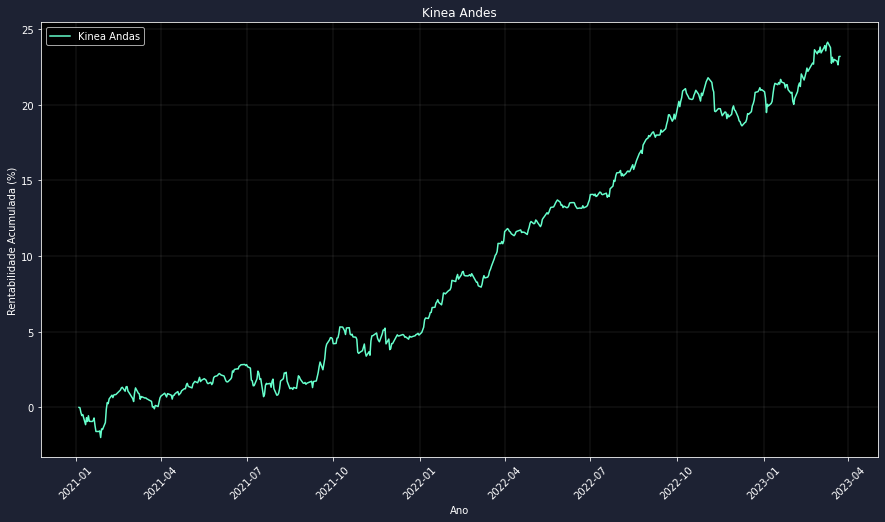

In [14]:
#plot 1:
#eixos
plt.style.use('dark_background')
plt.figure() 
plt.figure(figsize=(15,8))
plt.plot(kinea['DT_COMPTC'],kinea['Rent'],color= '#66FFCC')

plt.grid(color = '#FFFFFF',linestyle= '-',linewidth = 0.1)
plt.title("Kinea Andes")
plt.xlabel("Ano")
plt.ylabel("Rentabilidade Acumulada (%)")

fig = plt.gcf()
fig.set_facecolor('#1D2233')  # cor em hexadecimal

plt.xticks(rotation=45)

plt.legend(['Kinea Andas'])

plt.show()